In [6]:
import pandas as pd 
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv("joined.txt",sep="\nsdf",header=None)
data.columns=["text"]
data["len"]=[len(str(data.loc[i].values[0]).split()) for i in range(len(data))]
data

<ipython-input-35-987e57a43b26>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv("joined.txt",sep="\nsdf",header=None)


,text,len
0,Indonesian Journal of Electrical Engineering a...,8
1,"Vol. 21, No. 3, March 2021, pp. 1731~1738",8
2,"ISSN: 2502-4752, DOI: 10.11591/ijeecs.v21.i3.p...",6
3,Journal homepage: http://ijeecs.iaescore.com,3
4,Evaluation of SVM performance in the detection...,10
...,...,...
4364,ExposureInuAs_DICOM 3200,2
4365,ExposureTime_DICOM 10,2
4366,RelativeXRayExposure_DICOM,1
4367,Table 10: Fields corresponding to the study wh...,14


In [36]:
data[data.len==1]

,text,len
29,Keywords:,1
31,CT-scan,1
32,Datasets,1
61,1732,1
111,1733,1
...,...,...
4354,PixelRepresentation_DICOM,1
4355,PixelAspectRatio_DICOM,1
4356,SpatialResolution_DICOM,1
4366,RelativeXRayExposure_DICOM,1


It's easy to notice that we should delete rows in which there is only one object in text field(most likely a page number, errors in conversion or document subtitle probably not needed in any model)

In [37]:
data=data[data.len!=1]
data

,text,len
0,Indonesian Journal of Electrical Engineering a...,8
1,"Vol. 21, No. 3, March 2021, pp. 1731~1738",8
2,"ISSN: 2502-4752, DOI: 10.11591/ijeecs.v21.i3.p...",6
3,Journal homepage: http://ijeecs.iaescore.com,3
4,Evaluation of SVM performance in the detection...,10
...,...,...
4362,XRayTubeCurrent_DICOM 320,2
4363,Exposure_DICOM 3,2
4364,ExposureInuAs_DICOM 3200,2
4365,ExposureTime_DICOM 10,2


## Regex

#### Abbrevations

In [38]:
processed=data.text.str.replace(r'No\.','Number')
processed=processed.str.replace(r'Vol\.','Volume')
processed=processed.str.replace(r'pp\.','Pages')

#### Web pages

In [39]:
processed=processed.str.replace(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*','Webpage')

#### Lowering case

In [40]:
processed=processed.str.lower()

#### Punctuation

In [41]:
# remove punctuation
processed=processed.str.replace(r'[^\w\d\s]','')
# more than one space 
processed=processed.str.replace(r'\s+',' ')
# remove spaces from front and back
processed=processed.str.replace(r'^\s+|\s+?$','')

#### Dates

In [42]:
processed=processed.str.replace(r'\d+\.\d+\.\d+|\d+\-\d+\-\d+','date')
processed=processed.str.replace(r'january|jan','date')
processed=processed.str.replace(r'febryary|feb','date')
processed=processed.str.replace(r'march|mar','date')
processed=processed.str.replace(r'april|apr','date')
processed=processed.str.replace(r'may','date')
processed=processed.str.replace(r'june|jun','date')
processed=processed.str.replace(r'july|jul','date')
processed=processed.str.replace(r'august|aug','date')
processed=processed.str.replace(r'september|sep|sept','date')
processed=processed.str.replace(r'october|oct','date')
processed=processed.str.replace(r'november|nov','date')
processed=processed.str.replace(r'december|dec','date')
# we shall remove digits later

#### Numbers

In machinne learning process we won't be needinng exact numeric values thats why we encoded more important ones earlier , and now we can remove the remainnder

In [43]:
processed=processed.str.replace(r'\d','')
processed

0       indonesian journal of electrical engineering a...
1                            volume  number  date  pages 
2                                    issn  doi webpage ď 
3                                journal homepage webpage
4       evaluation of svm performance in the detection...
                              ...                        
4362                               xraytubecurrent_dicom 
4363                                      exposure_dicom 
4364                                 exposureinuas_dicom 
4365                                  exposuretime_dicom 
4367    table  fields corresponding to the study which...
Name: text, Length: 3897, dtype: object

## Part of speech tagging

In [98]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

(array([16290.,  2313.,     0.,  2353.,     0.,  3318.,  1881.,     0.,
           86.,   109.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

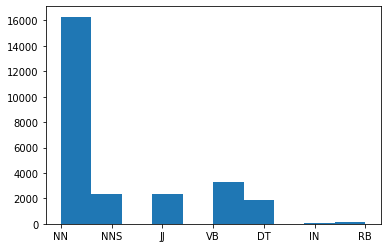

In [108]:
tags=[]
for line in processed:
    tokenized = sent_tokenize(line)
    for i in tokenized:

        # Word tokenizers is used to find the words
        # and punctuation in a string
        wordsList = nltk.word_tokenize(i)

        # removing stop words from wordList
        wordsList = [w for w in wordsList if not w in stop_words]

        #  Using a Tagger. Which is part-of-speech
        # tagger or POS-tagger.
        for word in wordsList:
            tags.append(nltk.pos_tag(word)[0][1])
plt.hist(tags)

As we can see most of our data set is composed of nouns.

In [27]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ["I'm going to watch not play","I'm going to play not watch","I'm going to play and watch","I'm going to play or watch"]

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)


C:\Users\Maciek\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


In [28]:
results=pd.DataFrame(embeddings)
results["sentence"]=sentences
results

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,sentence
0,0.557289,-0.677850,0.600699,-1.013320,0.549623,0.662713,-0.103804,0.377351,0.089433,0.569709,...,0.404015,-0.304997,0.127756,-0.351788,-0.162131,0.054187,-0.134969,0.011720,-0.133558,I'm going to watch not play
1,0.607865,-0.737236,0.650087,-1.023249,0.474659,0.670830,-0.097471,0.145482,0.202266,0.781124,...,0.618903,-0.330518,0.165074,-0.318487,-0.117133,0.030180,-0.077585,0.091692,-0.133012,I'm going to play not watch
2,0.558693,-0.579964,0.368871,-0.915958,0.066782,0.659565,0.104521,0.344094,0.023420,0.588810,...,0.666475,-0.251735,0.175419,-0.676548,0.179707,0.053674,-0.229929,0.073401,-0.442318,I'm going to play and watch
3,0.604434,-0.711962,0.774026,-0.917038,0.193101,0.580707,-0.005960,0.205026,0.604979,0.671710,...,0.557836,-0.186183,-0.047241,-0.735098,0.183046,0.043885,-0.436836,0.275630,-0.478181,I'm going to play or watch


Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as

${\displaystyle {\text{cosine similarity}}=S_{C}(A,B):=\cos(\theta )={\mathbf {A} \cdot \mathbf {B} \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}},}$

The cosine similarity measures the similarity between vector lists by calculating the cosine angle between the two vector lists. If you consider the cosine function, its value at 0 degrees is 1 and -1 at 180 degrees. This means for two overlapping vectors, the value of cosine will be maximum and minimum for two precisely opposite vectors.

In [29]:
from scipy import spatial
1 - spatial.distance.cosine(results.iloc[0,:-1], results.iloc[1,:-1])

0.9627648591995239

In [30]:
1 - spatial.distance.cosine(results.iloc[0,:-1], results.iloc[2,:-1])

0.7000849843025208

In [31]:
1 - spatial.distance.cosine(results.iloc[1,:-1], results.iloc[2,:-1])

0.6720165610313416

In [32]:
1 - spatial.distance.cosine(results.iloc[3,:-1], results.iloc[2,:-1])

0.878617525100708

In [33]:
1 - spatial.distance.cosine(results.iloc[3,:-1], results.iloc[1,:-1])

0.6336308717727661

In [34]:
1 - spatial.distance.cosine(results.iloc[3,:-1], results.iloc[0,:-1])

0.6560454368591309

# BERT embedding 

In [46]:
embeddings = model.encode(pd.array(processed))

C:\Users\Maciek\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


In [49]:
pd.DataFrame(embeddings)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.602188,0.562107,-0.346970,-0.284925,0.202138,-0.682676,-0.189156,0.356635,-0.074140,-0.082910,...,0.253502,-0.217884,-0.195755,0.255856,-0.595901,0.345819,0.249606,-0.053912,0.688430,0.144065
1,-0.332806,0.508936,0.083444,0.235220,-0.613477,0.286126,-0.748617,-0.242678,0.638196,0.343479,...,0.187946,0.117543,0.542721,-0.173157,-0.191739,0.030890,0.112062,-0.883366,-0.497201,-0.929634
2,-0.552587,0.913959,0.033528,-0.366940,-0.270106,0.158297,-0.466381,0.434515,0.713359,0.490611,...,-0.371110,-0.216512,0.162969,0.011953,-0.286792,0.002479,0.539010,-0.515986,0.125243,-0.236371
3,-0.822611,0.294319,-0.178213,0.742620,0.123581,-0.048046,-0.872719,0.178744,0.342302,0.357441,...,-0.357239,-0.002093,0.041864,0.086779,0.013782,0.373335,0.340590,-0.382113,0.316429,-0.118182
4,-0.308265,0.180802,-0.174810,-0.516703,0.323666,-0.001323,0.148514,0.219945,0.169237,-0.115425,...,-0.633099,-0.052006,0.240671,-0.195744,0.173719,0.385438,0.343920,-0.277336,-0.179559,0.152401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,-0.278320,-0.064603,-0.009361,-0.198512,-0.555154,-0.147735,0.708115,0.109706,-0.731126,0.135103,...,-0.336736,0.278102,0.125399,-0.211005,0.371553,0.150948,-0.143946,0.277610,0.847329,0.160846
3893,-0.333848,0.633314,0.355734,0.466809,0.785626,-0.357702,1.231409,0.286715,-0.510810,0.417141,...,-0.893457,-0.061400,0.462824,0.254046,0.053779,-0.184203,0.344259,-0.230702,-0.281625,0.767919
3894,-0.216098,0.235419,0.040257,0.569344,0.691011,-0.162694,1.316629,0.431406,-0.345816,0.488383,...,-0.862707,-0.224438,0.767837,0.105895,0.092282,-0.226844,0.362820,-0.277494,-0.058948,0.729242
3895,-0.414234,0.308480,0.224142,0.302820,0.643370,-0.269277,0.820429,0.083202,-0.352037,0.196937,...,-0.402627,-0.134629,0.530582,0.003905,0.157889,-0.046476,0.250381,-0.007038,-0.497557,0.659666


In [51]:
pd.array(processed)

<PandasArray>
[      'indonesian journal of electrical engineering and computer science',
                                            'volume  number  date  pages ',
                                                    'issn  doi webpage ď ',
                                                'journal homepage webpage',
           'evaluation of svm performance in the detection of lung cancer',
                                              'in dateked ct scan dataset',
                                                        'hamdalla webpage',
                                                      'muayed s alhusieny',
                                                          'furat y mohsen',
                                                           'enam a khalil',
 ...
                                                       'bitsstored_dicom ',
                                                     'windowcenter_dicom ',
                                                      'windowwidth_di

## Lemmatization

In [52]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

In [59]:
lemmatized=[lemmatizer.lemmatize(a) for a in pd.array(processed)]
lemmatized[:15]

['indonesian journal of electrical engineering and computer science',
 'volume  number  date  pages ',
 'issn  doi webpage ď ',
 'journal homepage webpage',
 'evaluation of svm performance in the detection of lung cancer',
 'in dateked ct scan dataset',
 'hamdalla webpage',
 'muayed s alhusieny',
 'furat y mohsen',
 'enam a khalil',
 'zainab s hassan',
 'department of electrical engineering college of engineering wasit university wasit iraq',
 'the oncology teaching hospital the medical city baghdad iraq',
 'article info abstract',
 'article history']

In [60]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()

In [61]:
stemmed=[ps.stem(a) for a in pd.array(processed)]
stemmed[:15]

['indonesian journal of electrical engineering and computer sci',
 'volume  number  date  pages ',
 'issn  doi webpage ď ',
 'journal homepage webpag',
 'evaluation of svm performance in the detection of lung canc',
 'in dateked ct scan dataset',
 'hamdalla webpag',
 'muayed s alhusieni',
 'furat y mohsen',
 'enam a khalil',
 'zainab s hassan',
 'department of electrical engineering college of engineering wasit university wasit iraq',
 'the oncology teaching hospital the medical city baghdad iraq',
 'article info abstract',
 'article histori']